
# Probabilistic Classification using Naïve Bayes  
## Scenario 1 – Multinomial Naïve Bayes (SMS Spam Classification)

**Name:** Satheesh  
**Roll No:** 24BAD107  




## Step 1: Import Required Libraries


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



## Step 2: Load Dataset


In [2]:
import kagglehub

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print(path)

import os
os.listdir(path)


Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
/kaggle/input/sms-spam-collection-dataset


['spam.csv']

In [7]:
df = pd.read_csv(path + "/spam.csv", encoding="latin-1")
df = df[['v1','v2']]
df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



## Step 3: Text Preprocessing


In [8]:

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

df['cleaned'] = df['message'].apply(clean_text)



## Step 4: Convert Text to Numerical Features (Count Vectorization)


In [9]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label'].map({'ham':0,'spam':1})



## Step 5: Train-Test Split


In [22]:
X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(
    X, y, df, test_size=0.2, random_state=42
)


## Step 6: Train Multinomial Naïve Bayes Model


In [23]:

model = MultinomialNB(alpha=1.0)  # Laplace smoothing
model.fit(X_train, y_train)


MultinomialNB()


## Step 7: Predictions


In [24]:

y_pred = model.predict(X_test)



## Step 8: Model Evaluation


In [25]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.97847533632287
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115




## Step 9: Confusion Matrix


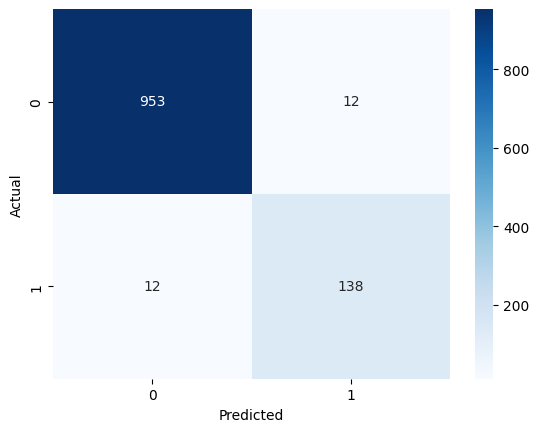

In [26]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## Step 10: Misclassified Examples


In [27]:
misclassified = df_test[y_test != y_pred]
misclassified[['label','message']].head()


,label,message
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
683,spam,Hi I'm sue. I am 20 years old and work as a la...
3504,ham,"life alle mone,eppolum oru pole allalo"
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...


In [29]:
model_no_smooth = MultinomialNB(alpha=0)
model_no_smooth.fit(X_train, y_train)
pred1 = model_no_smooth.predict(X_test)

model_smooth = MultinomialNB(alpha=1)
model_smooth.fit(X_train, y_train)
pred2 = model_smooth.predict(X_test)

print("Accuracy without smoothing:", accuracy_score(y_test, pred1))
print("Accuracy with smoothing:", accuracy_score(y_test, pred2))

Accuracy without smoothing: 0.9147982062780269
Accuracy with smoothing: 0.97847533632287


/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(



## Step 11: Top Words Influencing Spam


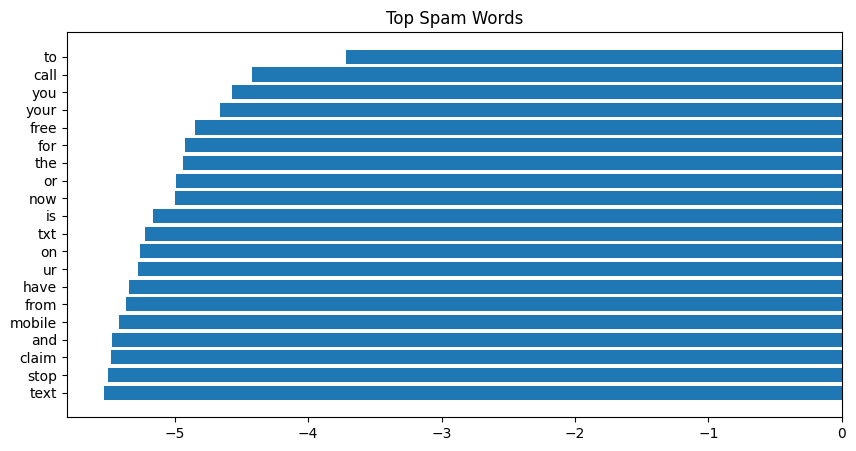

In [33]:

feature_names = vectorizer.get_feature_names_out()
spam_probs = model.feature_log_prob_[1]
top_spam = np.argsort(spam_probs)[-20:]

plt.figure(figsize=(10,5))
plt.barh(feature_names[top_spam], spam_probs[top_spam])
plt.title("Top Spam Words")
plt.show()


## Step 12:Word frequency comparison (Spam vs Ham)

In [35]:
spam_words = " ".join(df[df['label']=="spam"]['cleaned'])
ham_words = " ".join(df[df['label']=="ham"]['cleaned'])

from collections import Counter

spam_common = Counter(spam_words.split()).most_common(10)
ham_common = Counter(ham_words.split()).most_common(10)

print("Top Spam Words:", spam_common)
print("Top Ham Words:", ham_common)

Top Spam Words: [('to', 686), ('a', 376), ('call', 347), ('you', 287), ('your', 263), ('free', 216), ('the', 204), ('for', 202), ('now', 189), ('or', 188)]
Top Ham Words: [('i', 2179), ('you', 1835), ('to', 1554), ('the', 1115), ('a', 1048), ('u', 969), ('and', 848), ('in', 811), ('me', 754), ('my', 743)]


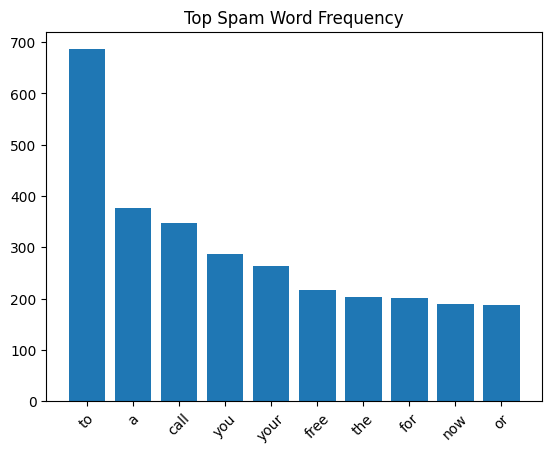

In [34]:
#Visualization
labels = [word for word, count in spam_common]
counts = [count for word, count in spam_common]

plt.bar(labels, counts)
plt.title("Top Spam Word Frequency")
plt.xticks(rotation=45)
plt.show()